In [36]:
!pip install featurewiz
!pip install git+https://github.com/AutoViML/featurewiz.git

  Cloning https://github.com/AutoViML/featurewiz.git to /tmp/pip-req-build-nqb3f518
  Running command git clone -q https://github.com/AutoViML/featurewiz.git /tmp/pip-req-build-nqb3f518
  Created wheel for featurewiz: filename=featurewiz-0.0.33-cp37-none-any.whl size=63428 sha256=dcbdcf61a1c20bad03dac8822f512ef0b1b71863a762d87ca327baf496edf73d
  Stored in directory: /tmp/pip-ephem-wheel-cache-9n7538p3/wheels/83/45/72/f76efff6fc83ec9d061a468a911f8181103fda58e88d5365e8
Successfully built featurewiz


In [37]:
import nltk
import pandas as pd
import numpy as np # linear algebra

from featurewiz import featurewiz


In [66]:

#dataset_names = ['8combined-ling-allextt']
#df = [pd.read_csv('./' + dataset_name + '.csv', index_col="Unnamed: 0"') for dataset_name in dataset_names] 
#print(df)
#datapath = [('./' + dataset_names + '.csv')
datapath = './8combined-ling-allextt.csv'
#print (datapath)

df = pd.read_csv(datapath, index_col = "index")
df = df[df.columns[:-2]]
#df = df.sample(frac=1.0, random_state=99)
print(df.shape)
df.head()


(1502, 76)


,IsFunctional,IsQuality,ProjectID,Length,AdvMod,AMod,AComp,DTreeHeight,dobj,nummod,acl,amod,auxpass,advmod,nsubjpass,nsubj,nmod,advcl,ROOT+nummod,aux+nummod,det+nummod,nummod+punct,ROOT+dobj,aux+dobj,nummod+pobj,nsubj+dobj,nsubj+nummod,dobj+pobj,ROOT+nummod+punct,aux+ROOT+nummod,aux+nummod+punct,det+ROOT+nummod,det+nummod+punct,det+aux+nummod,ROOT+det+dobj,nsubj+det+dobj,aux+det+dobj,nsubj+aux+dobj,ROOT_dobj_det,ROOT_dobj_acl_aux,ROOT_dobj_acl_dobj_det,ROOT_prep_pobj_det,ROOT_auxpass,ROOT_prep_pobj_compound,ROOT_nsubj,ROOT_ccomp_aux,ROOT_nsubj_nummod,ROOT_prep_pobj_nummod,ROOT_dobj_det+ROOT_nsubj_det,ROOT_aux+ROOT_dobj_det,ROOT_dobj_det+ROOT_punct,ROOT_aux+ROOT_aux,ROOT_punct+ROOT_punct,ROOT_aux+ROOT_dobj_acl_aux,ROOT_dobj_acl_aux+ROOT_dobj_det,ROOT_dobj_acl_aux+ROOT_punct,ROOT_dobj_acl_aux+ROOT_nsubj_det,ROOT_prep_pobj_det+ROOT_punct,ROOT_aux+ROOT_dobj_det+ROOT_nsubj_det,ROOT_dobj_det+ROOT_nsubj_det+ROOT_punct,ROOT_aux+ROOT_dobj_det+ROOT_punct,ROOT_aux+ROOT_aux+ROOT_punct,ROOT_aux+ROOT_punct+ROOT_punct,ROOT_aux+ROOT_aux+ROOT_nsubj_det,ROOT_nsubj_det+ROOT_punct+ROOT_punct,ROOT_aux+ROOT_dobj_acl_aux+ROOT_dobj_det,ROOT_aux+ROOT_dobj_acl_aux+ROOT_punct,ROOT_dobj_acl_aux+ROOT_dobj_det+ROOT_punct,Modal,Adjective,Noun,Adverb,Cardinal,CompSupAdj,CompSupAdv,Words
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,56,0,0,0,3,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,9
1,0,1,1,98,0,0,0,10,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,3,0,0,0,0,16
2,0,1,1,158,0,0,1,7,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,2,2,2,0,3,0,0,29
3,0,1,1,197,1,2,2,7,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,2,4,2,2,2,0,0,36
4,0,1,1,203,0,1,1,8,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,2,3,3,0,3,0,0,35


Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Shape of your Data Set loaded: (1502, 76)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    75 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
Shape of your Data Set loaded: (1502, 76)
Number of processors on machine = 1
    GPU active on this device
    Running XGBoost using GPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    75 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 74 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time..

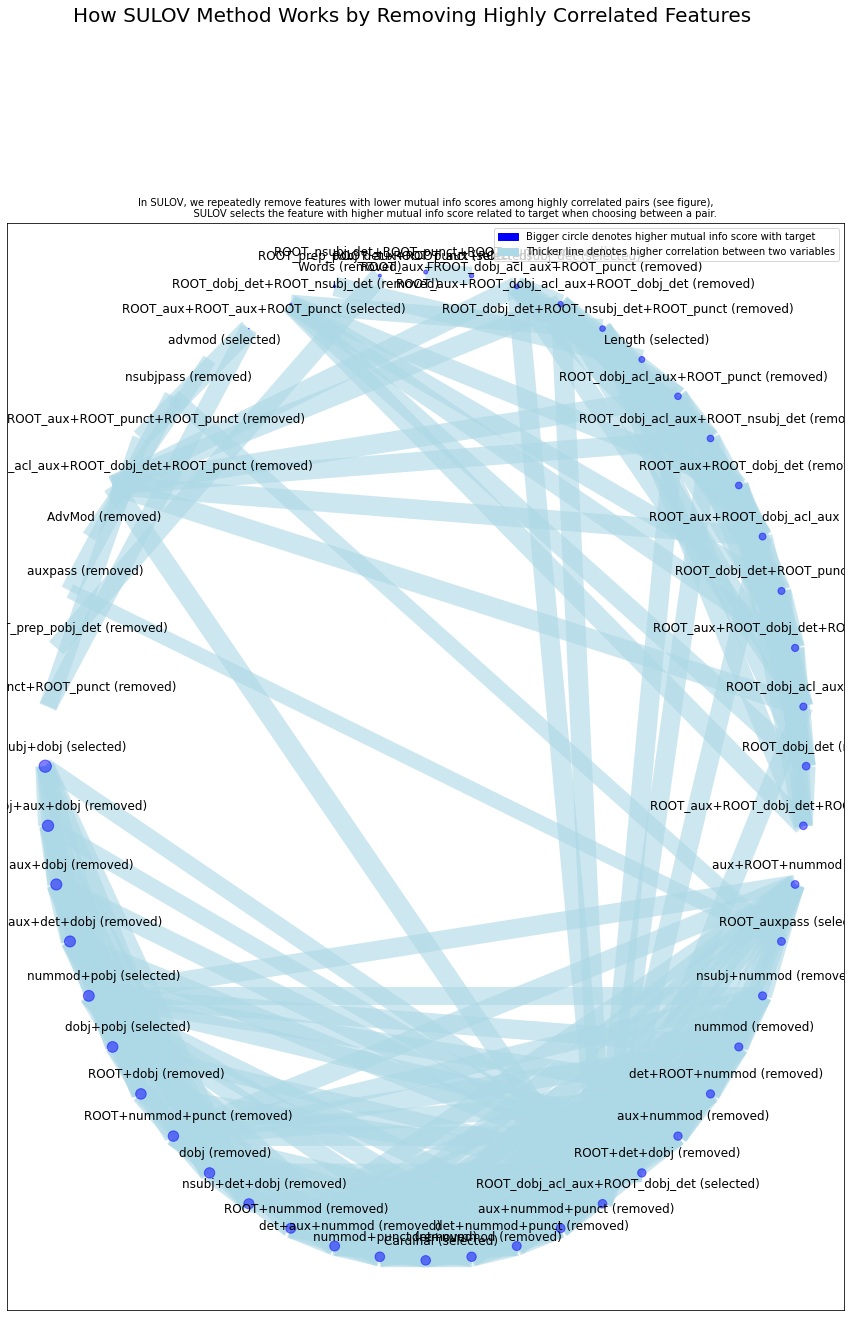

    Adding 0 categorical variables to reduced numeric variables  of 34
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 34 
    Finding Important Features using Boosted Trees algorithm...
        using 34 variables...
        using 27 variables...
        using 20 variables...
        using 13 variables...
        using 6 variables...
Selected 18 important features from your dataset
    Time taken (in seconds) = 2
Returning list of 18 important features and dataframe.


In [69]:

target = 'IsFunctional'
output = featurewiz(df, 
                    target, 
                   corr_limit=0.70,
                  verbose=2, 
                   sep=',', 
                   header=1, 
                   test_data='',
                   feature_engg='', 
                   category_encoders='')

#output = featurewiz(df, target)

In [68]:
print(output)

(['IsQuality', 'nsubj+aux+dobj', 'ROOT_ccomp_aux', 'AComp', 'nummod', 'ProjectID', 'ROOT_nsubj', 'ROOT_nsubj_nummod', 'ROOT_aux+ROOT_dobj_acl_aux', 'dobj+pobj', 'nsubj', 'CompSupAdj', 'Modal', 'ROOT_nsubj_det+ROOT_punct+ROOT_punct', 'auxpass', 'ROOT_aux+ROOT_dobj_det', 'ROOT_prep_pobj_det+ROOT_punct', 'advmod', 'Length'],        IsQuality  nsubj+aux+dobj  ROOT_ccomp_aux  ...  advmod  Length  IsFunctional
index                                             ...                              
0              1               1               0  ...       0      56             1
1              1               1               0  ...       0      98             0
2              1               1               0  ...       0     158             0
3              1               1               0  ...       1     197             0
4              1               0               0  ...       0     203             0
...          ...             ...             ...  ...     ...     ...           ...
1497